<a href="https://colab.research.google.com/github/JS0206/Data_Analysys_Programming/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install matplotlib seaborn

In [13]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumBarunGothic'


# 데이터 로드
weather = pd.read_csv("/content/drive/MyDrive/데이터분석프로젝트/2021년_날씨데이터.csv")
airport_stat = pd.read_csv("/content/drive/MyDrive/데이터분석프로젝트/2021년_공항데이터.csv")
delay_stat = pd.read_csv("/content/drive/MyDrive/데이터분석프로젝트/2021년_지연데이터.csv")
cancel_stat = pd.read_csv("/content/drive/MyDrive/데이터분석프로젝트/2021년_결항데이터.csv")

weather.drop('관측지점별', axis = 1, inplace = True)
airport_stat.drop('공항별(1)', axis = 1, inplace = True)
delay_stat.drop('공항별(1)', axis = 1, inplace = True)
cancel_stat.drop('공항별(1)', axis = 1, inplace = True)

weather.set_index(keys='시점', inplace = True)
airport_stat.set_index(keys='시점', inplace = True)
delay_stat.set_index(keys='시점', inplace = True)
cancel_stat.set_index(keys='시점', inplace = True)

airport_stat.drop(['시점'], axis = 0, inplace = True)
delay_stat.drop(['시점'], axis = 0 , inplace = True)
cancel_stat.drop(['시점'], axis = 0 , inplace = True)

weather.index = weather.index.astype(str)

delay_stat['지연'] = delay_stat['지연'].astype(float)
delay_stat['운항'] = delay_stat['운항'].astype(float)

delay_stat['지연율'] = delay_stat['지연'] / delay_stat['운항'] * 100

cancel_stat['결항'] = cancel_stat['결항'].astype(float)
cancel_stat['운항'] = cancel_stat['운항'].astype(float)

cancel_stat['결항률'] = cancel_stat['결항'] / cancel_stat['운항'] * 100

print(weather.head())
print(airport_stat.head())
print(delay_stat.head())
print(cancel_stat.head())



         평균기온 (℃)  합계강수량 (mm) 최심적설 (cm)  평균풍속 (m/s)  평균전운량 (할)
시점                                                            
2021.01       6.8       116.6       9.2         3.9        6.9
2021.02       9.4        52.8       1.8         3.9        5.7
2021.03      12.5        81.1         -         3.1        5.9
2021.04      15.4        58.8         -         3.2        5.5
2021.05      19.0       100.7         -         3.0        5.8
        운항 (편)   여객 (명)
시점                     
2021.01   3407   527721
2021.02   5531   881023
2021.03   6476   989039
2021.04   7310  1183138
2021.05   7527  1208731
              운항     지연       지연율
시점                               
2021.01   6355.0   70.0  1.101495
2021.02  10230.0  161.0  1.573803
2021.03  12069.0   55.0  0.455713
2021.04  13789.0  100.0  0.725216
2021.05  14093.0   33.0  0.234159
              운항     결항       결항률
시점                               
2021.01   6355.0  355.0  5.586153
2021.02  10230.0   56.0  0.547410
2021.03  12069.0 

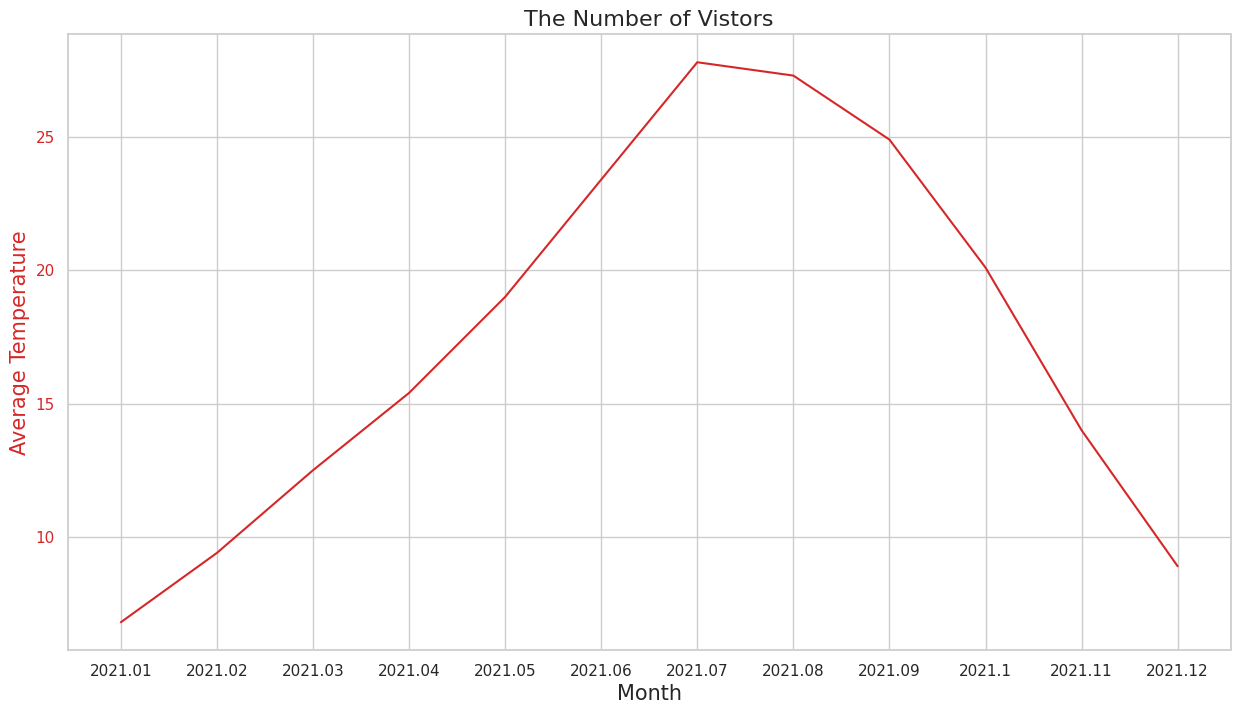

In [15]:

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(15, 8))

# 첫 번째 축 (운항 및 여객 그래프)
color = 'tab:red'
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Average Temperature', color=color, fontsize=15)
ax1.plot(weather.index, weather['평균기온 (℃)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


# 그래프 타이틀 설정
plt.title('The Number of Vistors', fontsize=16)

# 그래프 출력
plt.show()
